# Wine Quality Classficiation

Author: Ruba Alomari

Use wine quality dataset available at https://archive.ics.uci.edu/ml/datasets/wine+quality. We will use the winequality-red.csv file available at https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [41]:
#load libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#load the dataset

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
#df = pd.read_csv("datasets/wine/winequality-white-red.csv", sep=',')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df=pd.read_csv(url, sep=';')


1-Take a Quick Look at the Data Structure using head, info, and describe.

In [43]:
#Use head, info and describe

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2-Print the wine quality correlation matrix with the other attributes.

In [46]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

3-Find the value count of the  quality attribute

In [47]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

4- Split the data into 80% training set and 20% testing set, and print the shape of  X_train, y_train, X_test, and y_test.

In [48]:
#split the data into training and testing

from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


5- Train a svm model to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

clf = SVC(kernel='rbf', C=1, gamma=1)
clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

6-Test your model on the test set, and report the classification_report.

In [50]:
y_predict=clf.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict))

classification_report for C = 1
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.87      0.63       130
           6       0.53      0.31      0.39       132
           7       1.00      0.29      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.52       320
   macro avg       0.34      0.24      0.24       320
weighted avg       0.55      0.52      0.47       320



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7- Plot the confusion matrix of your test results 

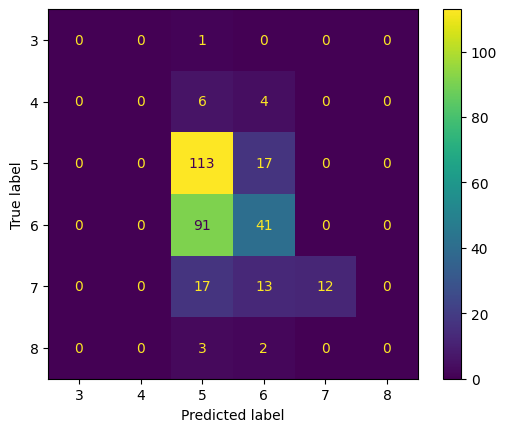

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

8- Evaluate clf using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

In [52]:
from sklearn.model_selection import cross_val_predict, cross_val_score

clf = SVC(kernel='rbf', C=1, gamma=1)
svm_scores = cross_val_score(clf, X_train, y_train, cv=5)
svm_scores

array([0.56640625, 0.56640625, 0.5703125 , 0.58203125, 0.57647059])

In [53]:
print(f'Cross-Validation Mean Accuracy: {svm_scores.mean()}')

Cross-Validation Mean Accuracy: 0.5723253676470588


9-Use GridSearchCV to find the best value of kernel, gamma, and C.

Split the dataset into 60% training, 20% validation, and 20% testing. 

In [54]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(959, 11) (959,) (320, 11) (320,) (320, 11) (320,)


In [55]:
# code author luisguiserrano 

from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)



0.53125

In [56]:
svm_winner

SVC(C=10, gamma=0.01)